# WeatherPy
----

### Analysis
* The weather becomes warmer as one approaches the equator (0 Deg. Latitude). However, the southern hemisphere (-60 to 0 degrees) seems to be warmer this time of year (3/23/2019) than the northern hemisphere (0 to 80 degrees).
* There is no strong relationship between latitude and cloudiness. However, there are less cities with zero cloudiness between -20 and 0 degrees than for the rest of the latitude range.
* There is no strong relationship between latitude and wind speed. However, higher wind speeds exist in the northern hemisphere than in the southern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
weather_df=pd.DataFrame(columns={"City":[],
            "Cloudiness":[],
            "Country":[],
            "Date":[],
            "Humidity":[],
            "Lat":[],
            "Lng":[],
            "Max Temp":[],
            "Min Temp":[], 
            "Avg Temp":[],                     
            "Wind Speed":[]
           },index=[i for i in range(len(cities))])
weather_df.head()

City Cloudiness Country Date Humidity  Lat  Lng Max Temp Min Temp Avg Temp  \
0  NaN        NaN     NaN  NaN      NaN  NaN  NaN      NaN      NaN      NaN   
1  NaN        NaN     NaN  NaN      NaN  NaN  NaN      NaN      NaN      NaN   
2  NaN        NaN     NaN  NaN      NaN  NaN  NaN      NaN      NaN      NaN   
3  NaN        NaN     NaN  NaN      NaN  NaN  NaN      NaN      NaN      NaN   
4  NaN        NaN     NaN  NaN      NaN  NaN  NaN      NaN      NaN      NaN   

  Wind Speed  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [35]:
#see API output

settings = {
    "units": "metric",
    "appid": api_key,
    "q" : cities[0]
}
response = requests.get(base_url, params=settings)
response=response.json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 7.07, 'lon': -73.85},
 'dt': 1553374800,
 'id': 3689169,
 'main': {'humidity': 78,
          'pressure': 1009,
          'temp': 28,
          'temp_max': 28,
          'temp_min': 28},
 'name': 'Barrancabermeja',
 'sys': {'country': 'CO',
         'id': 8568,
         'message': 0.0038,
         'sunrise': 1553338688,
         'sunset': 1553382349,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 27.0016, 'speed': 1.12}}


In [20]:
#make API calls for all cities

base_url= "http://api.openweathermap.org/data/2.5/weather?"

i=0
record_index=0
for city in cities:
    try:
        settings = {
            "units": "metric",
            "appid": api_key,
            "q" : city
        }
        response = requests.get(base_url, params=settings)
        response=response.json()
        print(f"Processing Record {record_index+1} | {city}")
        cloudiness=response['clouds']['all']
        country=response['sys']['country']
        date=response['dt']
        humidity=response['main']['humidity']
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        max_temp=response['main']['temp_max']
        min_temp=response['main']['temp_min']
        avg_temp=response['main']['temp']
        wind_speed=response['wind']['speed']
        weather_df['City'].iloc[i]=city
        weather_df['Cloudiness'].iloc[i]=cloudiness
        weather_df['Country'].iloc[i]=country
        weather_df['Date'].iloc[i]=date
        weather_df['Humidity'].iloc[i]=humidity
        weather_df['Lat'].iloc[i]=lat
        weather_df['Lng'].iloc[i]=lng
        weather_df['Max Temp'].iloc[i]=max_temp
        weather_df['Min Temp'].iloc[i]=min_temp
        weather_df['Avg Temp'].iloc[i]=avg_temp
        weather_df['Wind Speed'].iloc[i]=wind_speed
        i=i+1
        record_index=record_index+1
    except:
        print("City not found. Skipping...")
        record_index=record_index+1
        

Processing Record 1 | barrancabermeja
Processing Record 2 | hilo
Processing Record 3 | cidreira
Processing Record 4 | georgetown
Processing Record 5 | impfondo
Processing Record 6 | rikitea
Processing Record 7 | voyvozh
Processing Record 8 | namibe
Processing Record 9 | torbay
Processing Record 10 | chimore
Processing Record 11 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 | hasaki
Processing Record 13 | pyshma
Processing Record 14 | bredasdorp
Processing Record 15 | mogadishu
Processing Record 16 | busselton
Processing Record 17 | hermanus
Processing Record 18 | saskylakh
Processing Record 19 | new norfolk
Processing Record 20 | praia da vitoria
Processing Record 21 | hobart
Processing Record 22 | sao joao da barra
Processing Record 23 | cape town
Processing Record 24 | sarakhs
Processing Record 25 | punta arenas
Processing Record 26 | barrow
Processing Record 27 | puerto ayora
Processing Record 28 | albany
Processing Record 29 | mys shmidta
City not found. Skipp

In [21]:
weather_df

City Cloudiness Country        Date Humidity    Lat     Lng  \
0      barrancabermeja         40      CO  1553374800       78   7.07  -73.85   
1                 hilo         90      US  1553377273       54  19.71 -155.08   
2             cidreira          0      BR  1553377003       79 -30.17  -50.22   
3           georgetown         20      GY  1553374800       70    6.8  -58.16   
4             impfondo         80      CD  1553377003       91   1.62   18.06   
5              rikitea         64      PF  1553376743       97 -23.12 -134.97   
6              voyvozh         12      RU  1553377333       78  62.89   54.96   
7               namibe         48      AO  1553376884      100 -15.19   12.15   
8               torbay         90      CA  1553376891       93  47.66  -52.73   
9              chimore         32      BO  1553377004       78 -16.98  -65.13   
10              hasaki         20      JP  1553374941       80  35.73  140.83   
11              pyshma          0      RU  1553377334       62  56.95   63.25   
12          bredasdorp         44      ZA  1553376690       83 -34.53   20.04   
13           mogadishu         76      SO  1553376913      100   2.04   45.34   
14           busselton         68      AU  1553376810       56 -33.64  115.35   
15            hermanus         76      ZA  1553376690       91 -34.42   19.24   
16           saskylakh          0      RU  1553377005       38  71.97  114.09   
17         new norfolk         20      AU  1553377334       72 -42.78  147.06   
18    praia da vitoria         75      PT  1553376837       81  38.73  -27.07   
19              hobart         20      AU  1553377214       72 -42.88  147.33   
20   sao joao da barra         75      BR  1553374800       78 -21.64  -41.05   
21           cape town          0      ZA  1553376790       88 -33.93   18.42   
22             sarakhs          0      TM  1553374800       87  36.54   61.16   
23        punta arenas         75      CL  1553376791       76 -53.16  -70.91   
24              barrow         80      AR  1553377007       96 -38.31  -60.23   
25        puerto ayora         20      EC  1553376689       74  -0.74  -90.35   
26              albany          1      US  1553376840       40  42.65  -73.75   
27               sitka          0      US  1553376707       43  37.17  -99.65   
28             russell          0      AR  1553374800       32 -33.01   -68.8   
29           jamestown         92      AU  1553377008       86 -33.21   138.6   
..                 ...        ...     ...         ...      ...    ...     ...   
594                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
595                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
596                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
597                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
598                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
599                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
600                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
601                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
602                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
603                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
604                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
605                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
606                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
607                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
608                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
609                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
610                NaN        NaN     NaN         NaN      NaN    NaN     NaN   
611                NaN        NaN     NaN        

In [22]:
weather_df.dropna(how='all',inplace=True)
weather_df

City Cloudiness Country        Date Humidity    Lat  \
0              barrancabermeja         40      CO  1553374800       78   7.07   
1                         hilo         90      US  1553377273       54  19.71   
2                     cidreira          0      BR  1553377003       79 -30.17   
3                   georgetown         20      GY  1553374800       70    6.8   
4                     impfondo         80      CD  1553377003       91   1.62   
5                      rikitea         64      PF  1553376743       97 -23.12   
6                      voyvozh         12      RU  1553377333       78  62.89   
7                       namibe         48      AO  1553376884      100 -15.19   
8                       torbay         90      CA  1553376891       93  47.66   
9                      chimore         32      BO  1553377004       78 -16.98   
10                      hasaki         20      JP  1553374941       80  35.73   
11                      pyshma          0      RU  1553377334       62  56.95   
12                  bredasdorp         44      ZA  1553376690       83 -34.53   
13                   mogadishu         76      SO  1553376913      100   2.04   
14                   busselton         68      AU  1553376810       56 -33.64   
15                    hermanus         76      ZA  1553376690       91 -34.42   
16                   saskylakh          0      RU  1553377005       38  71.97   
17                 new norfolk         20      AU  1553377334       72 -42.78   
18            praia da vitoria         75      PT  1553376837       81  38.73   
19                      hobart         20      AU  1553377214       72 -42.88   
20           sao joao da barra         75      BR  1553374800       78 -21.64   
21                   cape town          0      ZA  1553376790       88 -33.93   
22                     sarakhs          0      TM  1553374800       87  36.54   
23                punta arenas         75      CL  1553376791       76 -53.16   
24                      barrow         80      AR  1553377007       96 -38.31   
25                puerto ayora         20      EC  1553376689       74  -0.74   
26                      albany          1      US  1553376840       40  42.65   
27                       sitka          0      US  1553376707       43  37.17   
28                     russell          0      AR  1553374800       32 -33.01   
29                   jamestown         92      AU  1553377008       86 -33.21   
..                         ...        ...     ...         ...      ...    ...   
525                    ladario          0      PT  1553377051       67   40.7   
526                 the valley         20      AI  1553376828       65  18.22   
527    villanueva de la serena         12      ES  1553377262       46  38.97   
528                  santa ana         75      SV  1553376915       24  13.99   
529                     luanda         76      AO  1553377458      100  -8.83   
530                     ranong          8      TH  1553377458      100   9.96   
531                  itaberaba         92      BR  1553377458       89 -12.52   
532                    aksarka          0      RU  1553377458       63  66.56   
533                      eskil         56      TR  1553377459       67   38.4   
534  santa isabel do rio negro         44      BR  1553377459       90  -0.41   
535                     mangan          0      IN  1553377459       46   27.5   
536                     tommot         80      RU  1553377459       87  58.97   
537             kulhudhuffushi          0      MV  1553377460      100   6.62   
538                       kaeo          0      NZ  1553377089       89  -35.1   
539                santa paula         90      US  1553377453       59  34.35   
540                     bonthe         92      SL  1553377460       72   7.53   
541                     matara         48      PE  1553377461       69 -13.74   
542                kloulklubed         40      PW  155337

In [24]:
# Export file as a CSV, without the Pandas index, but with the header
output_data_file = "output_data/cities.csv"
weather_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0,0.5,'Average Temperature (C)')

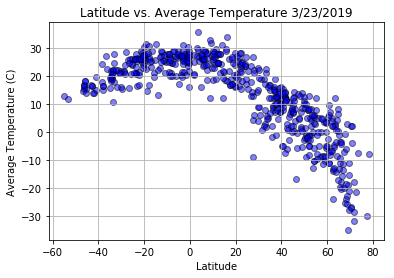

In [40]:
x_axis=weather_df['Lat']
data=weather_df['Avg Temp']
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.5)
plt.grid()
plt.title("Latitude vs. Average Temperature 3/23/2019")
plt.xlabel("Latitude")
plt.ylabel("Average Temperature (C)")

Text(0,0.5,'Humidity (%)')

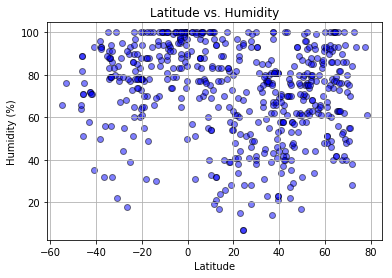

In [39]:
weather_df_humidity=weather_df.drop(weather_df.loc[weather_df['Humidity']>100].index)
x_axis=weather_df_humidity['Lat']
data=weather_df_humidity['Humidity']
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.5)
plt.grid()
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0,0.5,'Cloudiness (%)')

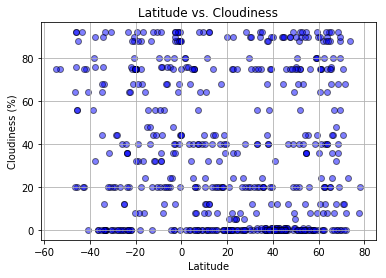

In [41]:
x_axis=weather_df['Lat']
data=weather_df['Cloudiness']
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.5)
plt.grid()
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed (mph)')

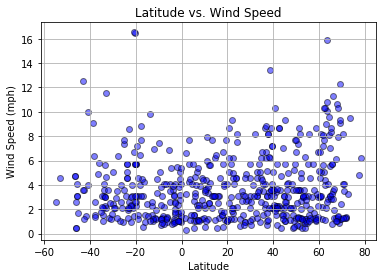

In [42]:
x_axis=weather_df['Lat']
data=weather_df['Wind Speed']
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.5)
plt.grid()
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")